In [1]:
import geopandas as gpd

In [77]:
full_data = gpd.read_file("C:/Users/sawag/Desktop/Testing/602/FV-NC/Fuquay-Varina_Recycling_and_Leaf_Collection_Routes.shp")


<AxesSubplot:>

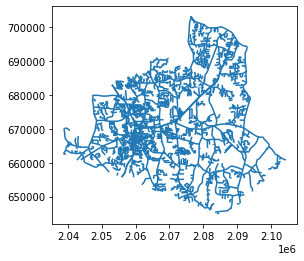

In [78]:
full_data.plot()

In [79]:
full_data.geometry.head()

0    MULTILINESTRING ((2079280.743 690784.981, 2079...
1    LINESTRING (2072888.009 667711.053, 2073086.17...
2    LINESTRING (2075058.868 669823.464, 2075241.75...
3    LINESTRING (2075009.925 669521.818, 2075187.49...
4    LINESTRING (2057190.784 665471.841, 2057054.29...
Name: geometry, dtype: geometry

In [80]:
print(full_data.crs)

epsg:2264


In [81]:
full_data.crs

<Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Stokes; Sur

In [82]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [83]:
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

In [84]:
m_1

In [85]:
from geopandas.tools import geocode
from geopy.geocoders import Nominatim
import pandas as pd

In [86]:
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode("Champ de Mars, Paris, France")

In [87]:
print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = 48.85614465, Longitude = 2.297820393322227


In [88]:
#point = location.geometry.iloc[0]
print("Latitude:", location.latitude)
print("Longitude:", location.longitude)

Latitude: 48.85614465
Longitude: 2.297820393322227


In [89]:
location = locator.geocode("Champ de Mars, Paris, France")

In [90]:
df = pd.read_csv("addresses.csv")
df.head()

,Unnamed: 0,Typ,Nr,Namn,Address1,Address3,Address4,Address5,Telefon
0,0,Butik,102,Fältöversten,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,08/662 22 89
1,1,Butik,104,NaN,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,08/662 50 16
2,2,Butik,106,Garnisonen,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,08/662 64 85
3,3,Butik,110,NaN,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,08/56849241
4,4,Butik,113,Sergel,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,08/21 47 44


In [91]:
df['ADDRESS'] = df['Address1']+','+df['Address3']+','+df['Address4']+','+df['Address5']+', Sweden'

In [92]:
from geopy.extra.rate_limiter import RateLimiter

geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
df['location'] = df['ADDRESS'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)

In [93]:
df['ADDRESS']

0     Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ...
1     Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,...
2     Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l...
3     Hötorgshallen,111 57,STOCKHOLM,Stockholms län,...
4     Drottninggatan 45,111 21,STOCKHOLM,Stockholms ...
5     Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms l...
6     Drottninggatan 22,111 51,STOCKHOLM,Stockholms ...
7     Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms l...
8     Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholm...
9     Lindhagensgatan 118,112 51,STOCKHOLM,Stockholm...
10    Fleminggatan 56,112 45,STOCKHOLM,Stockholms lä...
11    Odengatan 92,113 22,STOCKHOLM,Stockholms län, ...
12    Solnavägen 2b,113 65,STOCKHOLM,Stockholms län,...
13    Odengatan 58,113 22,STOCKHOLM,Stockholms län, ...
14    Birger Jarlsgatan 84,114 20,STOCKHOLM,Stockhol...
15    Sveavägen 66,111 34,STOCKHOLM,Stockholms län, ...
16    Vasagatan 25,111 20,STOCKHOLM,Stockholms län, ...
17    Götgatan 132,S-118 62,STOCKHOLM,Stockholms

In [94]:
df

,Unnamed: 0,Typ,Nr,Namn,Address1,Address3,Address4,Address5,Telefon,ADDRESS,location,point,latitude,longitude,altitude
0,0,Butik,102,Fältöversten,Karlaplan 13,115 20,STOCKHOLM,Stockholms län,08/662 22 89,"Karlaplan 13,115 20,STOCKHOLM,Stockholms län, ...","(13, Karlaplan, Östermalm, Östermalms stadsdel...","(59.3388914, 18.0909335, 0.0)",59.338891,18.090933,0.0
1,1,Butik,104,NaN,Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,08/662 50 16,"Nybrogatan 47,114 39,STOCKHOLM,Stockholms län,...","(47, Nybrogatan, Villastaden, Östermalm, Öster...","(59.3372072, 18.0790982, 0.0)",59.337207,18.079098,0.0
2,2,Butik,106,Garnisonen,Karlavägen 100 A,115 26,STOCKHOLM,Stockholms län,08/662 64 85,"Karlavägen 100 A,115 26,STOCKHOLM,Stockholms l...","(Karlavägen, Östermalm, Östermalms stadsdelsom...","(59.3358717, 18.0995103, 0.0)",59.335872,18.099510,0.0
3,3,Butik,110,NaN,Hötorgshallen,111 57,STOCKHOLM,Stockholms län,08/56849241,"Hötorgshallen,111 57,STOCKHOLM,Stockholms län,...","(Hötorgshallen, Hötorget, Klara, Norrmalm, Nor...","(59.3343273, 18.0626039, 0.0)",59.334327,18.062604,0.0
4,4,Butik,113,Sergel,Drottninggatan 45,111 21,STOCKHOLM,Stockholms län,08/21 47 44,"Drottninggatan 45,111 21,STOCKHOLM,Stockholms ...","(Drottninggatan, Klara, Norrmalm, Norrmalms st...","(59.3336068, 18.0616879, 0.0)",59.333607,18.061688,0.0
5,5,Butik,114,PK-Huset,Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms län,08/796 98 10,"Norrlandsgatan 3,111 47,STOCKHOLM,Stockholms l...","(Norrlandsgatan, Klara, Norrmalm, Norrmalms st...","(59.3329989, 18.071481, 0.0)",59.332999,18.071481,0.0
6,6,Butik,116,NaN,Drottninggatan 22,111 51,STOCKHOLM,Stockholms län,08/21 22 60,"Drottninggatan 22,111 51,STOCKHOLM,Stockholms ...","(22, Drottninggatan, Klara, Norrmalm, Norrmalm...","(59.3304666, 18.064907, 0.0)",59.330467,18.064907,0.0
7,7,Butik,132,Marieberg,Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms län,08/13 30 95,"Rålambsvägen 7-9,112 59,STOCKHOLM,Stockholms l...",None,None,NaN,NaN,NaN
8,8,Butik,133,NaN,Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholms län,08/653 39 17,"Kungsholmstorg 11 A,112 21,STOCKHOLM,Stockholm...","(Kungsholmstorg, Kungsholmen, Kungsholmens sta...","(59.32886965, 18.04308918335665, 0.0)",59.328870,18.043089,0.0
9,9,Butik,134,NaN,Lindhagensgatan 118,112 51,STOCKHOLM,Stockholms län,08/656 14 30,"Lindhagensgatan 118,112 51,STOCKHOLM,Stockholm...","(118, Lindhagensgatan, Hornsberg, Stadshagen, ...","(59.3373898, 18.009267, 0.0)",59.337390,18.009267,0.0


In [95]:
df1 = df.drop(['Address1', 'Address3', 'Address4', 'Address5','Telefon', 'ADDRESS', 'location', 'point'], axis=1)
df1.head()

,Unnamed: 0,Typ,Nr,Namn,latitude,longitude,altitude
0,0,Butik,102,Fältöversten,59.338891,18.090933,0.0
1,1,Butik,104,NaN,59.337207,18.079098,0.0
2,2,Butik,106,Garnisonen,59.335872,18.099510,0.0
3,3,Butik,110,NaN,59.334327,18.062604,0.0
4,4,Butik,113,Sergel,59.333607,18.061688,0.0


In [96]:
print(df1.index)

RangeIndex(start=0, stop=25, step=1)


In [97]:
df1

,Unnamed: 0,Typ,Nr,Namn,latitude,longitude,altitude
0,0,Butik,102,Fältöversten,59.338891,18.090933,0.0
1,1,Butik,104,NaN,59.337207,18.079098,0.0
2,2,Butik,106,Garnisonen,59.335872,18.099510,0.0
3,3,Butik,110,NaN,59.334327,18.062604,0.0
4,4,Butik,113,Sergel,59.333607,18.061688,0.0
5,5,Butik,114,PK-Huset,59.332999,18.071481,0.0
6,6,Butik,116,NaN,59.330467,18.064907,0.0
7,7,Butik,132,Marieberg,NaN,NaN,NaN
8,8,Butik,133,NaN,59.328870,18.043089,0.0
9,9,Butik,134,NaN,59.337390,18.009267,0.0


In [98]:
df1 = df1.drop(7)

In [99]:
df1 = df1.drop(21)

In [100]:
df1 = df1.drop(24)

In [101]:
df1

,Unnamed: 0,Typ,Nr,Namn,latitude,longitude,altitude
0,0,Butik,102,Fältöversten,59.338891,18.090933,0.0
1,1,Butik,104,NaN,59.337207,18.079098,0.0
2,2,Butik,106,Garnisonen,59.335872,18.099510,0.0
3,3,Butik,110,NaN,59.334327,18.062604,0.0
4,4,Butik,113,Sergel,59.333607,18.061688,0.0
5,5,Butik,114,PK-Huset,59.332999,18.071481,0.0
6,6,Butik,116,NaN,59.330467,18.064907,0.0
8,8,Butik,133,NaN,59.328870,18.043089,0.0
9,9,Butik,134,NaN,59.337390,18.009267,0.0
10,11,Butik,137,NaN,59.334950,18.030050,0.0


In [102]:
map1 = folium.Map(
    location=[59.338315,18.089960],
    tiles='cartodbpositron',
    zoom_start=12,
)
df1.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)
map1

In [115]:
import folium.plugins as plugins
folium_map = folium.Map(location=[59.338315,18.089960],
                        zoom_start=12,
                        tiles='CartoDB dark_matter')


plugins.FastMarkerCluster(data=list(zip(df1['latitude'].values, df1['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map